# CitySim

## About

While the original paper lists the locations shown in the following table, **the actual dataset we obtained includes a different set of locations**: 

- Expressway A
- Freeway B
- Freeway C
- Intersection A
- Intersection B
- Intersection D
- Intersection E
- Roundabout A
- Roundabout B

The data analysis in the subsequent sections will be **based on this actual dataset we received**.

| ID | Location | Location type | Drone height (m) | FPS | Recording resolution (pixel) | Recording length (min) |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | Expressway A | Weaving segment | 120 | 30 | 5120×2880 | 120 |
| 2 | Freeway B | Basic segment | 320 | 30 | 5120×2880 | 60 |
| 3 | Freeway C | Merge/diverge segment | 320 | 30 | 5120×2880 | 60 |
| 4 | Expressway D | Merge/diverge segment | 120 | 30 | 3840×2160 | 60 |
| 5 | Intersection A | Signalized intersection | 120 | 30 | 3840×2160 | 120 |
| 6 | Intersection B | Signalized intersection | 120 | 30 | 3840×2160 | 120 |
| 7 | Intersection C | Signalized intersection | 120 | 30 | 4096×2160 | 120 |
| 8 | Intersection D | Signalized intersection | 120 | 30 | 3840×2160 | 120 |
| 9 | Intersection E | Signalized intersection | 120 | 30 | 3840×2160 | 120 |
| 10 | Intersection F | Stop-control intersection | 120 | 30 | 3840×2160 | 120 |
| 11 | Intersection G | Control-free intersectiona | 120 | 30 | 3840×2160 | 120 | 60 |
| 12 | Intersection H | Control-free intersection | 120 | 30 | 3840×2160 | 120 | 60 |

### How to Apply

To apply for access to the full dataset, please send the official dataset holder [a request form](https://github.com/ozheng1993/UCF-SST-CitySim-Dataset/blob/main/asset/MainPage/Data_Request_Form.pdf) to this email: [citysim.ucfsst@gmail.com](mailto:citysim.ucfsst@gmail.com)

### Citation

```latex
@article{zheng2024citysim,
  title={CitySim: A drone-based vehicle trajectory dataset for safety-oriented research and digital twins},
  author={Zheng, Ou and Abdel-Aty, Mohamed and Yue, Lishengsa and Abdelraouf, Amr and Wang, Zijin and Mahmoud, Nada},
  journal={Transportation research record},
  volume={2678},
  number={4},
  pages={606--621},
  year={2024},
  publisher={SAGE Publications Sage CA: Los Angeles, CA}
}
```

## Data Analysis

> This part is independently conducted by Tactics2D.

### Overview of Available Locations

Here is a visualization of the available locations in the actual dataset.

![](https://raw.githubusercontent.com/MotacillaAlba/image-storage/main/img/citysim.png)

In [1]:
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import os
import glob

import polars as pl
import numpy as np
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting up parameters for matplotlib
mpl.rcParams.update(
    {
        "figure.dpi": 200,  # 200 for high quality
        "font.family": "DejaVu Sans Mono",
        "font.size": 6,
        "font.stretch": "semi-expanded",
        "animation.html": "jshtml",
        "animation.embed_limit": 5000,
        "axes.edgecolor": "black",
        "axes.linewidth": 0.8,
        "axes.grid": True,
        "grid.color": "#cccccc",
        "axes.facecolor": "white",
    }
)
sns.set_palette("Set2")

In [3]:
root_path = "../../data/Final Release"
csv_paths = {}

for dir_path, dir_names, file_names in os.walk(root_path):
    if os.path.basename(dir_path) == "Trajectories":
        csv_files = glob.glob(os.path.join(dir_path, "*.csv"))
        csv_paths[dir_path] = [os.path.basename(f) for f in csv_files]

### Distribution of Average Speed on Map

The speed of vehicles exhibits significant variation across different locations. Highways, for instance, display an average speed of over 30 m/s, while roundabouts show a much lower average speed of around 10 m/s. According to the speed heatmap, speed records are only available for lanes, and the dataset does not provide labels for the types of trajectories. Therefore, we have to assume that the CitySim dataset includes trajectory information solely for vehicle types, with no further categorization of trajectory types.

In [4]:
locations = [
    "Expressway A",
    "Freeway B",
    "Freeway C",
    "Intersection A",
    "Intersection B",
    "Intersection D",
    "Intersection E",
    "Roundabout A",
    "Roundabout B",
]
positions = [
    (0, 1, 0, 4),
    (1, 2, 0, 4),
    (2, 3, 0, 4),
    (0, 1, 4, 6),
    (1, 3, 4, 6),
    (3, 4, 0, 4),
    (3, 4, 4, 6),
    (4, 5, 0, 3),
    (4, 5, 3, 6),
]

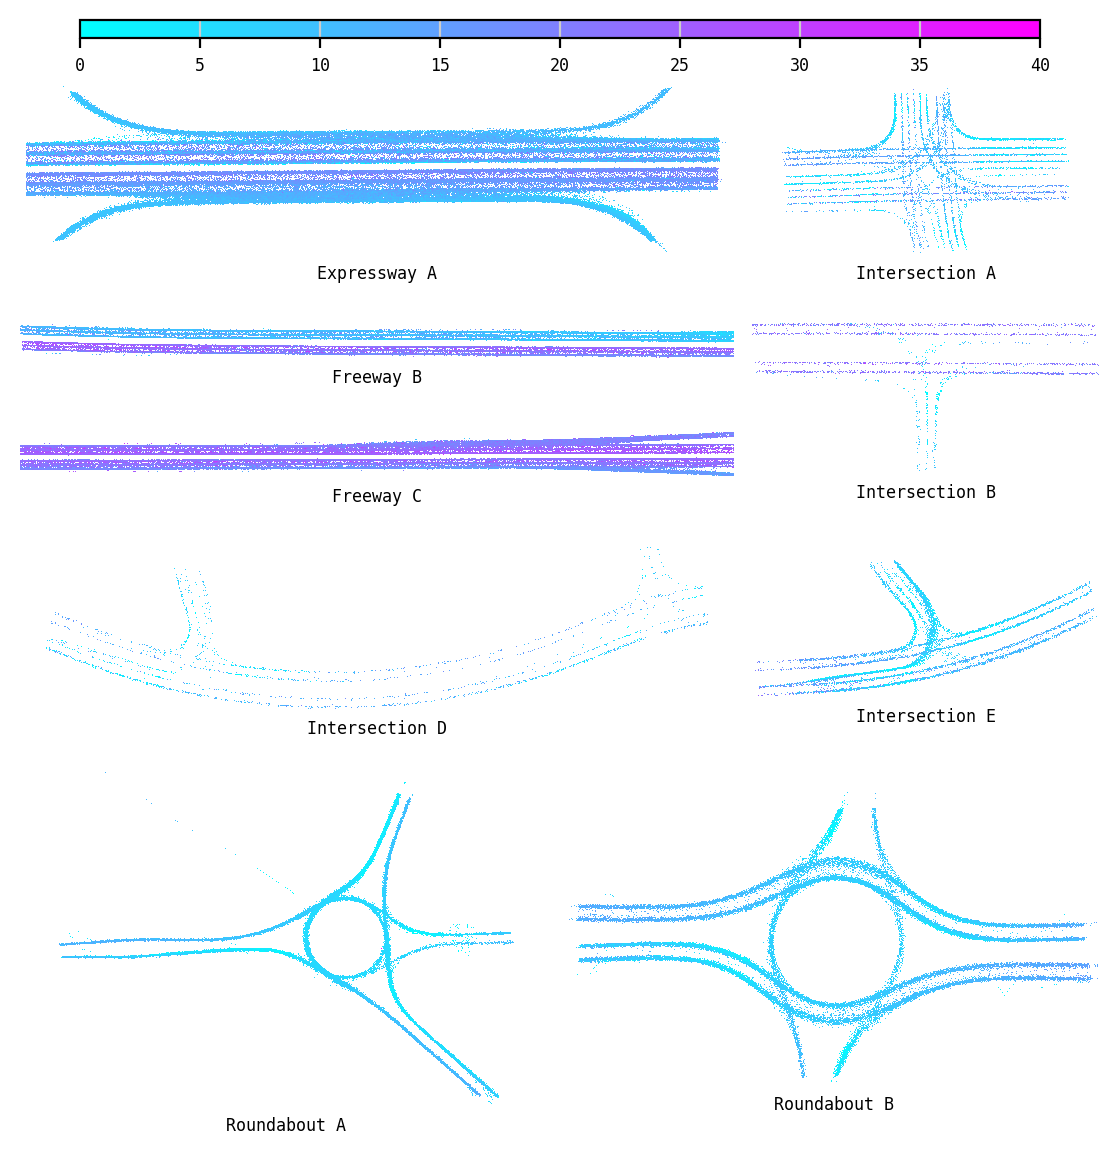

In [5]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(5, 6, figure=fig, height_ratios=[1.3, 0.4, 0.4, 1.3, 2.6])

fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05, wspace=0.1, hspace=0.4)

axes = []

for i, location in enumerate(locations):
    start_row, end_row, start_col, end_col = positions[i]
    ax = fig.add_subplot(gs[start_row:end_row, start_col:end_col])
    df = pl.DataFrame()

    for dir_path in csv_paths.keys():
        if location in dir_path:
            dir_path = dir_path
            csv_files = csv_paths[dir_path]
            break

    for csv_file in csv_files:
        df_csv = pl.read_csv(os.path.join(dir_path, csv_file))
        df_csv = df_csv.select(["carCenterX", "carCenterY", "speed"])
        df = pl.concat([df, df_csv])

    x_min = np.floor(df["carCenterX"].min())
    x_max = np.ceil(df["carCenterX"].max())
    y_min = np.floor(df["carCenterY"].min())
    y_max = np.ceil(df["carCenterY"].max())
    x_edges = np.linspace(x_min, x_max, num=int((x_max - x_min) * 10 + 1), endpoint=True)
    y_edges = np.linspace(y_min, y_max, num=int((y_max - y_min) * 10 + 1), endpoint=True)
    x_bin = np.digitize(df["carCenterX"].to_numpy(), x_edges) - 1
    y_bin = np.digitize(df["carCenterY"].to_numpy(), y_edges) - 1
    speed_m_per_s = 0.447 * df["speed"]  # convert speed's unit from mile/hour to m/s

    df = df.with_columns(
        [
            pl.Series("x_bin", x_bin),
            pl.Series("y_bin", y_bin),
            pl.Series("speed (m/s)", speed_m_per_s),
        ]
    )

    df_speed_heatmap = (
        df.group_by(["y_bin", "x_bin"])
        .agg(pl.col("speed (m/s)").mean().alias("avg_speed"))
        .sort(["y_bin", "x_bin"])
    ).to_pandas()

    grid = df_speed_heatmap.pivot(index="y_bin", columns="x_bin", values="avg_speed")

    hm = sns.heatmap(
        grid, ax=ax, cmap="cool", cbar=False, xticklabels=False, yticklabels=False, vmin=0, vmax=40
    )

    ax.set_aspect("equal")
    ax.set_xlabel(location)
    ax.set_ylabel("")
    axes.append(ax)

cbar_ax = fig.add_axes([0.1, 0.94, 0.8, 0.015])
fig.colorbar(axes[-1].collections[0], cax=cbar_ax, orientation="horizontal")

### Distribution of Lane Change Frequency on Map

The heatmap suggests that lane changes are relatively infrequent in this dataset, even in highway scenarios where such behavior is typically more common.

Maximum lane changing in one grid (Expressway A): 30
Maximum lane changing in one grid (Freeway B): 4
Maximum lane changing in one grid (Freeway C): 11
Maximum lane changing in one grid (Intersection A): 102
Maximum lane changing in one grid (Intersection B): 2
Maximum lane changing in one grid (Intersection D): 5
Maximum lane changing in one grid (Intersection E): 29
Maximum lane changing in one grid (Roundabout A): 18
Maximum lane changing in one grid (Roundabout B): 10


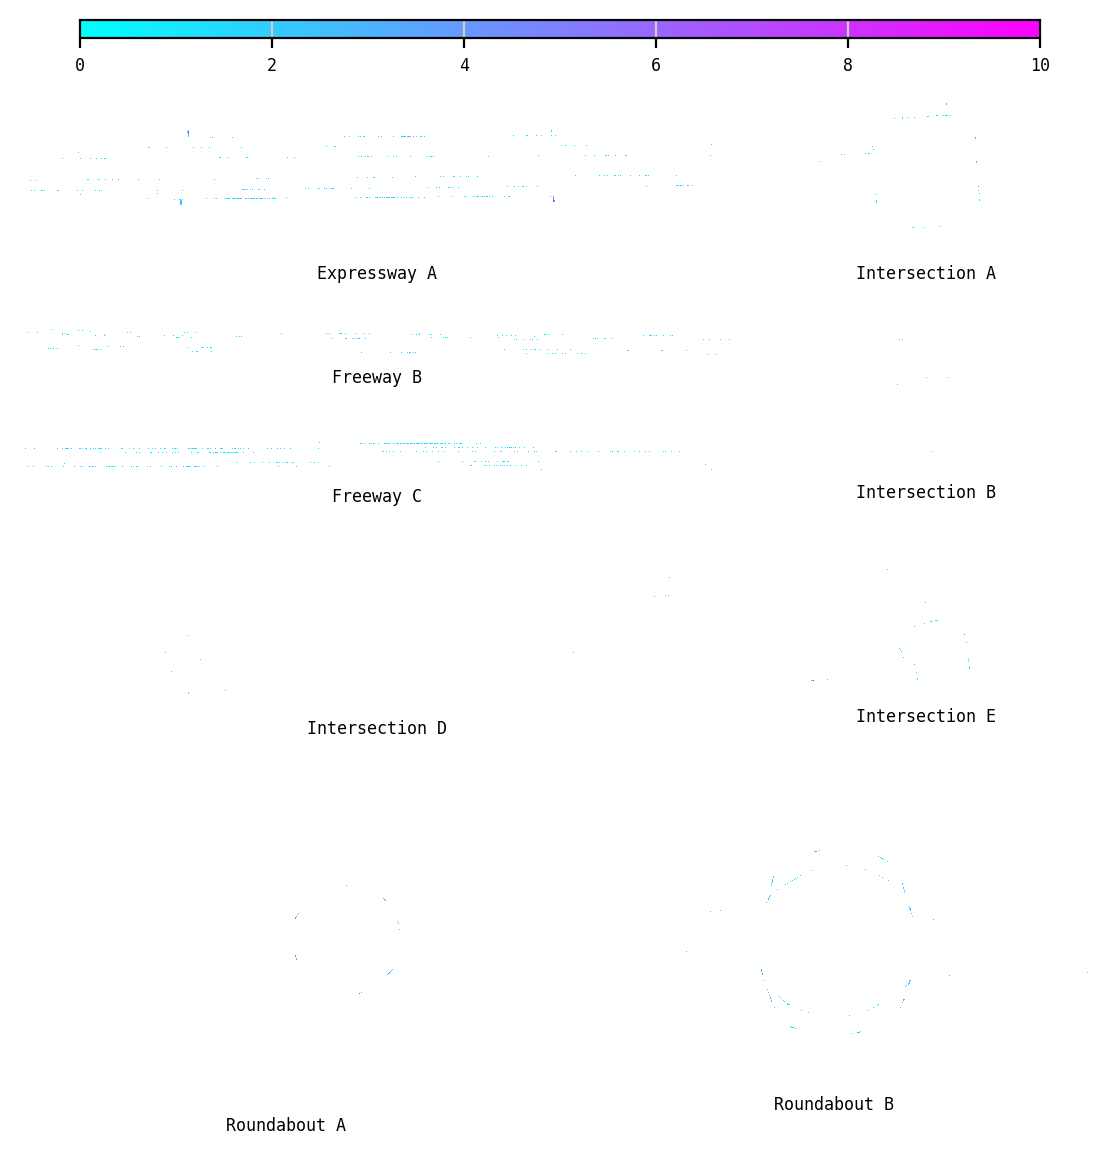

In [6]:
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(5, 6, figure=fig, height_ratios=[1.3, 0.4, 0.4, 1.3, 2.6])

fig.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.05, wspace=0.1, hspace=0.4)

axes = []

for i, location in enumerate(locations):
    start_row, end_row, start_col, end_col = positions[i]
    ax = fig.add_subplot(gs[start_row:end_row, start_col:end_col])
    df = pl.DataFrame()

    for dir_path in csv_paths.keys():
        if location in dir_path:
            dir_path = dir_path
            csv_files = csv_paths[dir_path]
            break

    for csv_file in csv_files:
        df_csv = pl.read_csv(os.path.join(dir_path, csv_file))
        df_csv = df_csv.select(["carId", "carCenterX", "carCenterY", "laneId", "frameNum"])
        df_csv = df_csv.with_columns(pl.lit(csv_file).alias("fileId"))
        df = pl.concat([df, df_csv])

    x_min = np.floor(df["carCenterX"].min())
    x_max = np.ceil(df["carCenterX"].max())
    y_min = np.floor(df["carCenterY"].min())
    y_max = np.ceil(df["carCenterY"].max())
    x_edges = np.linspace(x_min, x_max, num=int((x_max - x_min) * 2 + 1), endpoint=True)
    y_edges = np.linspace(y_min, y_max, num=int((y_max - y_min) * 2 + 1), endpoint=True)
    x_bin = np.digitize(df["carCenterX"].to_numpy(), x_edges) - 1
    y_bin = np.digitize(df["carCenterY"].to_numpy(), y_edges) - 1

    df = df.with_columns([pl.Series("x_bin", x_bin), pl.Series("y_bin", y_bin)])

    df_lane_changing = df.to_pandas()
    df_lane_changing = df_lane_changing.sort_values(by=["fileId", "carId", "frameNum"])
    df_lane_changing["prev_laneId"] = df_lane_changing.groupby(["fileId", "carId"])["laneId"].shift(
        1
    )
    df_lane_changing["laneChange"] = (
        df_lane_changing["laneId"] != df_lane_changing["prev_laneId"]
    ).astype(int)
    first_row_mask = df_lane_changing.groupby(["fileId", "carId"]).cumcount() == 0
    df_lane_changing.loc[first_row_mask, "laneChange"] = 0
    df_lane_changing_heatmap = (
        df_lane_changing.groupby(["y_bin", "x_bin"])["laneChange"].sum().unstack(fill_value=0)
    )
    print(
        f"Maximum lane changing in one grid ({location}): {df_lane_changing_heatmap.to_numpy().max()}"
    )

    mask = df_lane_changing_heatmap == 0
    hm = sns.heatmap(
        df_lane_changing_heatmap,
        mask=mask,
        ax=ax,
        cmap="cool",
        cbar=False,
        xticklabels=False,
        yticklabels=False,
        vmin=0,
        vmax=10,
    )

    ax.set_aspect("equal")
    ax.set_xlabel(location)
    ax.set_ylabel("")
    axes.append(ax)

cbar_ax = fig.add_axes([0.1, 0.94, 0.8, 0.015])
fig.colorbar(axes[-1].collections[0], cax=cbar_ax, orientation="horizontal")

### Distribution of Speed by Location

The distribution of vehicle speeds varies across different locations, but there is no clear correlation between scenario types and specific speed distribution patterns.

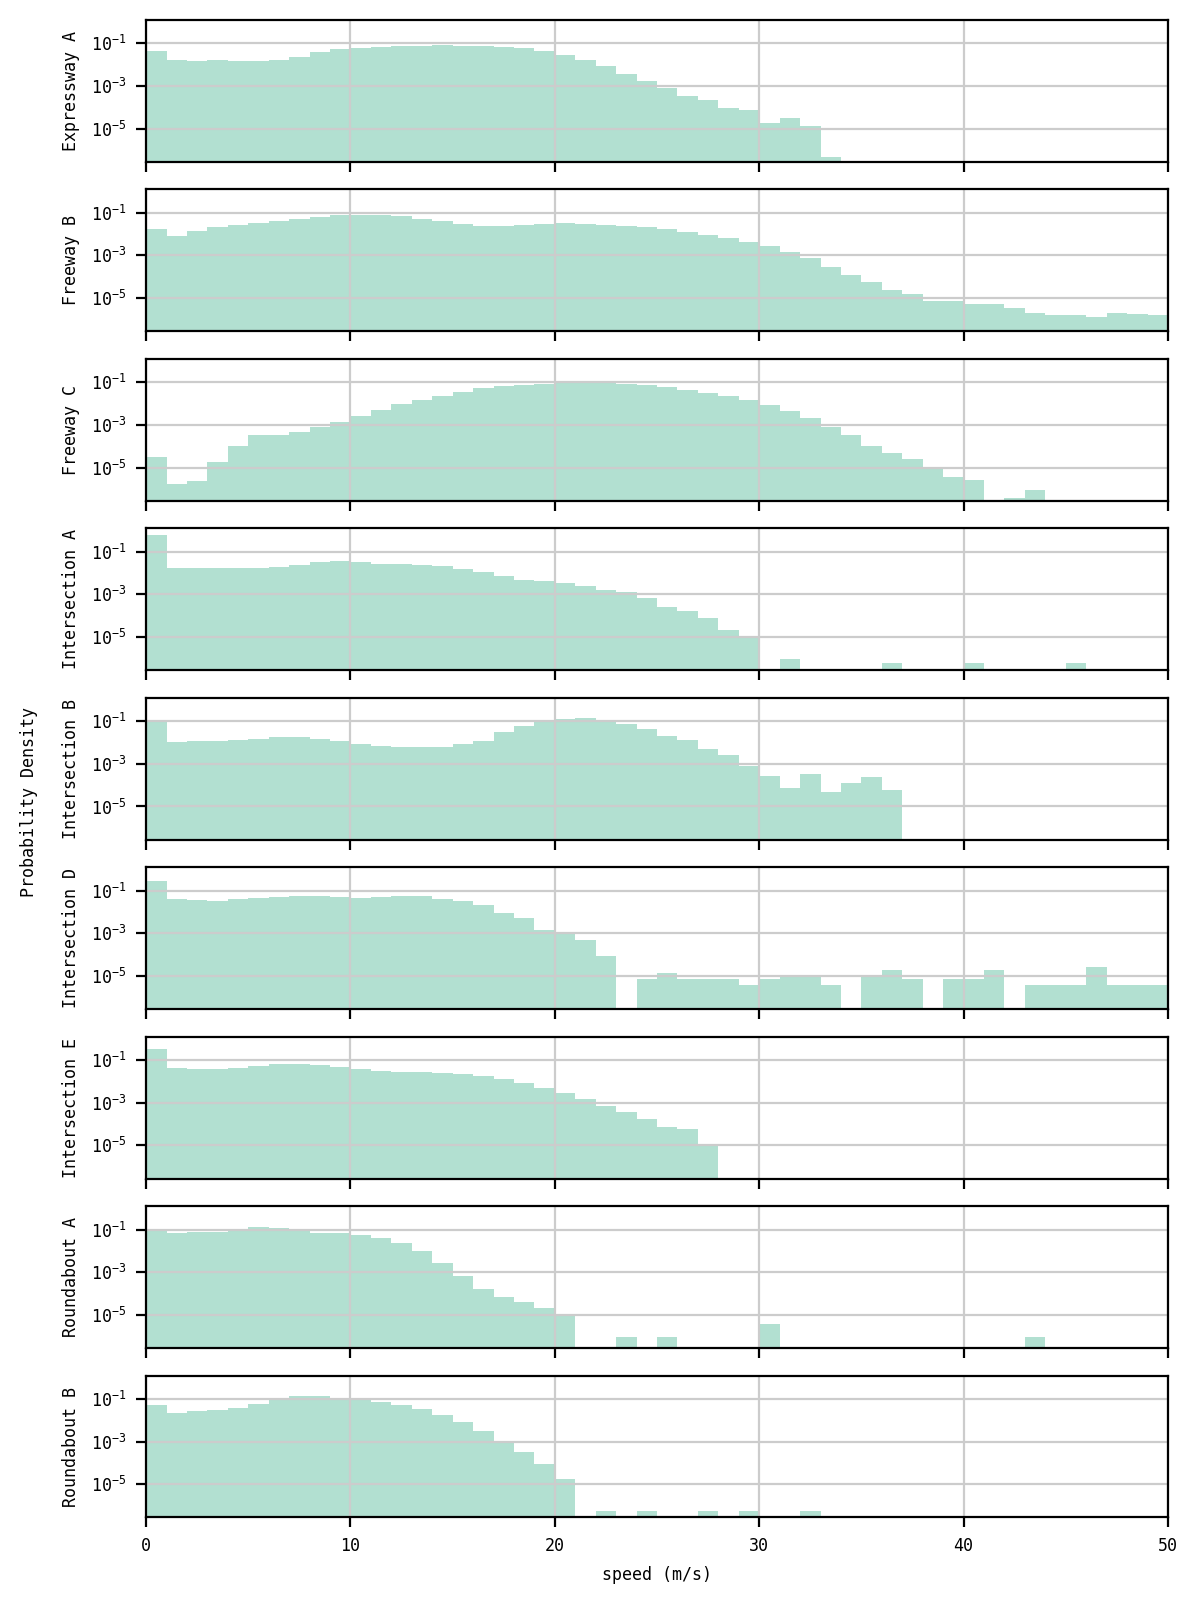

In [9]:
fig, axes = plt.subplots(9, 1, figsize=(6, 8), sharex=True, sharey=True)

for i, location in enumerate(locations):
    df = pl.DataFrame()

    for dir_path in csv_paths.keys():
        if location in dir_path:
            dir_path = dir_path
            csv_files = csv_paths[dir_path]
            break

    for csv_file in csv_files:
        df_csv = pl.read_csv(os.path.join(dir_path, csv_file))
        df_csv = df_csv.select(["speed"])
        df = pl.concat([df, df_csv])

    df_speed = df.to_pandas()
    df_speed["speed (m/s)"] = df_speed["speed"] * 0.447

    sns.histplot(
        df_speed,
        x="speed (m/s)",
        palette="Set2",
        ax=axes[i],
        stat="density",
        log_scale=(False, True),
        common_norm=False,
        binwidth=1.0,
        binrange=(0, 50),
        linewidth=0,
        alpha=0.5,
        legend=(i == 0),
    )

    axes[i].set_xlim([0, 50])
    axes[i].set_ylabel(location, fontsize=6)
    axes[i].set_yscale("log")

axes[-1].set_xlabel("speed (m/s)")
fig.text(0.02, 0.5, "Probability Density", va="center", rotation="vertical")

fig.tight_layout(rect=[0.04, 0, 1, 1])
plt.show()

## Appendix: Data Format

<div class="admonition note">
    <p class="admonition-title">Note</p>
    <p>
        This is a backup copy of 
        <a href="https://github.com/UCF-SST-Lab/UCF-SST-CitySim1-Dataset/wiki" target="_blank" rel="noopener noreferrer">
            the official documentation
        </a>, provided here for reference purposes only.
    </p>
</div>

### Trajectory
The UCF SST CitySim dataset contains vehicle trajectories captured using drone videos. The videos were captured at **30 frames per second**. Each row in the trajectory dataset represents a vehicle waypoint at a single frame in the video. Additionally, the dataset describes the rotation-aware vehicle bounding box in each row.

The following table describes the trajectory CSV columns and states their respective units.

| Name | Description | Unit |
| --- | --- | --- |
| frameNum | Frame number of the vehicle waypoint captured at 30 frames per second | - |
| carId | Vehicle unique identifier that remains consistent for all vehicle waypoints across the entire video | - |
| carCenterX | Pixel x-coordinate of vehicle bounding box center point | Pixel |
| carCenterY | Pixel y-coordinate of vehicle bounding box center point | Pixel |
| headX | Pixel x-coordinate of vehicle bounding box front center point | Pixel |
| headY | Pixel y-coordinate of vehicle bounding box front center point | Pixel |
| tailX | Pixel x-coordinate of vehicle bounding box rear center point | Pixel |
| tailY | Pixel y-coordinate of vehicle bounding box rear center point | Pixel |
| boundingBox1X | Pixel x-coordinate of vehicle bounding box vertex 1 | Pixel |
| boundingBox1Y | Pixel y-coordinate of vehicle bounding box vertex 1 | Pixel |
| boundingBox2X | Pixel x-coordinate of vehicle bounding box vertex 2 | Pixel |
| boundingBox2Y | Pixel y-coordinate of vehicle bounding box vertex 2 | Pixel |
| boundingBox3X | Pixel x-coordinate of vehicle bounding box vertex 3 | Pixel |
| boundingBox3Y | Pixel y-coordinate of vehicle bounding box vertex 3 | Pixel |
| boundingBox4X | Pixel x-coordinate of vehicle bounding box vertex 4 | Pixel |
| boundingBox4Y | Pixel y-coordinate of vehicle bounding box vertex 4 | Pixel |
| carCenterXft | X-coordinate of vehicle bounding box center point in feet | Feet |
| carCenterYft | Y-coordinate of vehicle bounding box center point in feet | Feet |
| headXft | X-coordinate of vehicle bounding box front center point in feet | Feet |
| headYft | Y-coordinate of vehicle bounding box front center point in feet | Feet |
| tailXft | X-coordinate of vehicle bounding box rear center point in feet | Feet |
| tailYft | Y-coordinate of vehicle bounding box rear center point in feet | Feet |
| boundingBox1Xft | X -coordinate of vehicle bounding box vertex 1 in feet | Feet |
| boundingBox1Yft | Y -coordinate of vehicle bounding box vertex 1 in feet | Feet |
| boundingBox2Xft | X -coordinate of vehicle bounding box vertex 2 in feet | Feet |
| boundingBox2Yft | Y -coordinate of vehicle bounding box vertex 2 in feet | Feet |
| boundingBox3Xft | X -coordinate of vehicle bounding box vertex 3 in feet | Feet |
| boundingBox3Yft | Y -coordinate of vehicle bounding box vertex 3 in feet | Feet |
| boundingBox4Xft | X-coordinate of vehicle bounding box vertex 4 in feet | Feet |
| boundingBox4Yft | Y -coordinate of vehicle bounding box vertex 4 in feet | Feet |
| carCenterLat* | Global latitude of vehicle bounding box center point | Degrees |
| carCenterLon* | Global longitude of vehicle bounding box center point | Degrees |
| headLat* | Global latitude of vehicle bounding box front center point | Degrees |
| headLon* | Global longitude of vehicle bounding box front center point | Degrees |
| tailLat* | Global latitude of vehicle bounding box rear center point | Degrees |
| tailLon* | Global longitude of vehicle bounding box rear  center point | Degrees |
| boundingBox1Lat* | Global latitude of vehicle bounding box vertex 1 | Degrees |
| boundingBox1Lon* | Global longitude of vehicle bounding box vertex 1 | Degrees |
| boundingBox2Lat* | Global latitude of vehicle bounding box vertex 1 | Degrees |
| boundingBox2Lon* | Global longitude of vehicle bounding box vertex 1 | Degrees |
| boundingBox3Lat* | Global latitude of vehicle bounding box vertex 1 | Degrees |
| boundingBox3Lon* | Global longitude of vehicle bounding box vertex 1 | Degrees |
| boundingBox4Lat* | Global latitude of vehicle bounding box vertex 1 | Degrees |
| boundingBox4Lon* | Global longitude of vehicle bounding box vertex 1 | Degrees |
| speed | Vehicle waypoint speed | Miles per Hour |
| heading | Vehicle waypoint heading relative to the global North | Degrees |
| course | Vehicle waypoint heading relative to the image coordinate X-axis| Degrees |
| laneId | Waypoint lane number according to the supplementary lane map | - |

*\*Only provided for US-based locations*

### X/Y-Coordinate System
The pixel coordinate system is displayed in the image below.

<img src="https://user-images.githubusercontent.com/3506082/177387608-aa9fbeaf-72de-4711-a0b6-7eed1af54d58.png" width="500">

### Vehicle Point Features

The vehicle center, head, tail, and bounding box vertices locations are described in figure below.
* Bounding box point 1 describes the front right vehicle corner
* Bounding box point 2 describes the rear right vehicle corner
* Bounding box point 3 describes the rear left vehicle corner
* Bounding box point 4 describes the front left vehicle corner

<img src="https://user-images.githubusercontent.com/3506082/179648490-8f7d37c6-b1a8-486d-8690-d03cc9e1df6d.png" width="500">

### Lane IDs

A lane map file (lanes.png) is provided for each location to describe the lane numbers.

### Base Map

Apart from the trajectory data, the CitySim dataset also provides simulation model for the corresponding location. The simulation model contains road network for microscopic traffic simulation software SUMO and automated driving software CARLA, which are both open-source simulators. The road network is built based on GIS data, and 3D high-fidelity architectures are embedded for the CARLA base map. Driving behavior model can be calibrated using the trajectories to produce realistic traffic flow in SUMO, and the calibrated model can be used for microscopic safety analysis or signal optimization. The CARLA base map enables researchers to conduct automated driving research including perception, CAV control in mixed traffic, etc.

#### Sumo

Sumo is an open-source microscopic traffic simulation software that provides powerful functions for simulating traffic flow. The Sumo model released in the dataset contains the road network file (.net.xml file) of the video location and its surrounding vicinity. 

#### CARLA

CARLA is an open-source automated driving simulator built on Unreal Engine 4. The maps can be imported to CARLA to generate a digital world of the video location. It enables the researchers to conduct automated driving study including sensor simulation and CAV control algorithm, etc.

### Signal Timing

The signal data CSV file provides event level data. Each record in the signal data represents a change in one of the signals. The data is represented by eight different digits that corresponds to different signal phases at an intersection.  The eight digits show whether the signal phase is red (r), yellow (y), or green (g). Furthermore, the event start time and duration were calculated based on the start frame and end frame corresponding to the recorded videos and trajectory data. The following table describes the signal CSV file columns and their respective units.

| Name | Description | Unit| 
| --- | --- | --- |
| startFrame | Signal event start frame | - |
| eventDuration | Signal event duration in seconds | Seconds |
| SBL | Southbound left turn signal phase (‘r’: red, ‘y’: yellow, ‘g’: green) | - |
| SBT | Southbound through signal phase (‘r’: red, ‘y’: yellow, ‘g’: green) | - |
| WBL | Westbound left turn signal phase (‘r’: red, ‘y’: yellow, ‘g’: green) | - |
| WBT | Westbound through signal phase (‘r’: red, ‘y’: yellow, ‘g’: green) | - |
| NBL | Northbound left turn signal phase (‘r’: red, ‘y’: yellow, ‘g’: green) | - |
| NBT | Northbound through signal phase (‘r’: red, ‘y’: yellow, ‘g’: green) | - |
| EBL | Eastbound left turn signal phase (‘r’: red, ‘y’: yellow, ‘g’: green) | - |
| EBT | Eastbound through signal phase (‘r’: red, ‘y’: yellow, ‘g’: green) | - |

### Signal Labels

A signal image file (signals.png) file is provided for each signalized intersection location to label the signals in the intersection.

### Metadata

The metadata CSV file contains information about the drone video recordings used to extract the vehicle trajectories. The following table describes the metadata CSV file columns and their respective units.

| Name | Description | Unit |
| --- | --- | --- |
| fileName | File name | - |
| frameSizeX | Pixel x-coordinate frame size | Pixel |
| frameSizeY | Pixel y-coordinate frame size | Pixel |
| recordingFrameRate | Frame rate of the drone video used to extract the trajectories | Frames Per Second |
| totalFrames | Total number of frames in the file | - |
| recordingTime | Recording time of the file (hh:mm) | - |
| duration | Duration of the file | Seconds |

### Supplementary Material

Each location contains 2 supplementary images: background.png and lanes.png. Signalized intersection locations additionally contain a signals.png file.

The background.png image is an aerial shot of the location with all the vehicles removed. It can be used for visualization purposes.

The lanes.png file describe the laneId values used in the trajectory CSV files.

The signals.png file describe the signals in the intersection.
